<img src="./figs/Stirling.pdf">

### Estimate the state and path tables for the Stirling Cycle
The Stirling cycle is a thermodynamic cycle invented, developed and patented in 1816 (eight years before Carnot)
by Robert Stirling. The [Stirling cycle](https://en.wikipedia.org/wiki/Stirling_cycle) has four steps:

 * 1 &rarr; 2: isothermal expansion from state 1 to state 2 along the $T_{H}$ isotherm
 * 2 &rarr; 3: isochoric (constant volume) transformation from state 2 to state 3
 * 3 &rarr; 4: isothermal compression from state 3 to state 4 along the $T_{L}$ isotherm
 * 4 &rarr; 1: isochoric (constant volume) transformation from state 4 to state 1

__Assume:__
(i) all transformations are reversible, and 1 mol of an ideal gas is used as the working fluid;
(ii) the heat capacity for the working fluid is C$_P$ = 29 J mol$^{-1}$ K$^{-1}$ and R = 8.314 J mol$^{-1}$ K$^{-1}$ or $\hat{\mathrm{R}}$ = 0.08314 bar L mol$^{-1}$ K$^{-1}$.


a) Complete the state and path tables by calculating the missing state, Q,W, $\Delta$U, $\Delta$H and $\Delta$S values for the cycle.

b) Sketch the Stirling cycle on a T-S diagram (label all operating points and transformation directions).

c) Estimate the efficiency of the Stirling cycle $\eta_{S}=-W_{net}/Q_{1~\rightarrow~2}$. Is the Stirling cycle more, approximately the same, or less efficient than the Carnot cycle operating at the same minimum and maximum temperatures?

#### Estimate the missing values in the state table
Start with the state table, find all values that you don't need to compute (because of the cycle, and what was given in the problem); we know that V$_{2}$ = V$_{3}$, V$_{4}$ = V$_{1}$, T$_{1}$ = T$_{2}$ and T$_{3}$ = T$_{4}$. This will leave estimating missing values using the IGL equation of state. 

In [13]:
# include -
include("./src/solution.jl");

In [5]:
# load my state table -
path_to_state_table_file = "./src/data/State.csv"
stateTable = load_state_table(path_to_state_table_file)

,State,T,P,V
,Int64,Int64,Float64,Float64
1,1,300,3.0,8.314
2,2,300,0.75,33.256
3,3,100,0.25,33.256
4,4,100,1.0,8.314


#### Estimate the missing values in the path table
Once the state table is done, you can fill in the missing values in the path table. 
Again, start by filling in values that you don't need to do any computation e.g., constant volume = no work, or isothermal = no change in internal energy for an ideal gas. 
Next, start with $\Delta{U}$, $\Delta{H}$ and $\Delta{S}$. To compute $\Delta{U}$ on $\mathcal{P}_{ij}$:

\begin{equation}
\Delta{U}_{ij} = C_{V}\Delta{T}_{ji}
\end{equation} 

while for $\Delta{H}$ you can use:

\begin{equation}
\Delta{H}_{ij} = C_{P}\Delta{T}_{ji}
\end{equation}

To compute the entropy change, we can start from the (T,V,S) form of the first law:

\begin{equation}
TdS = C_{V}dT+\left[\left(\frac{\partial{U}}{\partial{V}}\right)_{T}+P\right]dV
\end{equation}

Dividing through by T, substituting the IGL equation of state for P, and removing terms that are zero for an ideal gas gives (after integration) for path i to j:

\begin{equation}
\Delta{S}_{ij} = C_{V}\ln\left(T_{j}/T_{i}\right)+\hat{R}\ln\left(V_{j}/V_{i}\right)
\end{equation}

For an isothermal path, the general entropy equation reduces to:

\begin{equation}
\Delta{S}_{ij} = \hat{R}\ln\left(V_{j}/V_{i}\right)
\end{equation} 

while for constant volume paths, we can use:

\begin{equation}
\Delta{S}_{ij} = C_{V}\ln\left(T_{j}/T_{i}\right)
\end{equation}

Lastly, you can compute the heat and work either using the heat capacity for heat, or by the work expression:

\begin{equation}
W_{ij} = -\int_{V_{i}}^{V_{j}}PdV
\end{equation}

where you substitute the IGL equation of state into the integral to arrive at:

\begin{equation}
W_{ij} = -\hat{R}T\ln\left(V_{j}/V_{i}\right)
\end{equation} for the isothermal paths. Remember that $\Delta{U}$ = Q+W.

In [6]:
# load some constants -
path_to_constants_file = "./src/data/Constants.json"
cd = load_constants_dictionary(path_to_constants_file)

Dict{String,Any} with 4 entries:
  "Rhat" => 0.8314
  "Cv"   => 20.686
  "R"    => 8.314
  "Cp"   => 29.0

In [7]:
# compute the path table -
pathTable = compute_cycle_values(stateTable,cd)

,path,Q,W,delta_U,delta_H,delta_S
,String,Float64,Float64,Float64,Float64,Float64
1,1 -> 2,345.77,-345.77,0.0,0.0,1.15257
2,2 -> 3,-4137.2,0.0,-4137.2,-5800.0,-22.7259
3,3 -> 4,-115.257,115.257,0.0,0.0,-1.15257
4,4 -> 1,4137.2,0.0,4137.2,5800.0,22.7259
5,cycle,230.513,-230.513,0.0,0.0,3.55271e-15


In [8]:
# compute the efficiency -
eff_stirling = compute_efficiency(stateTable, cd)

0.6666666666666666

In [14]:
# compute Carnot eff -

In [9]:
eff_carnot = 1 - (minimum(stateTable[!,:T])/maximum(stateTable[!,:T]))

0.6666666666666667

#### Plot/sketch the Stirling cycle on a T-S plane

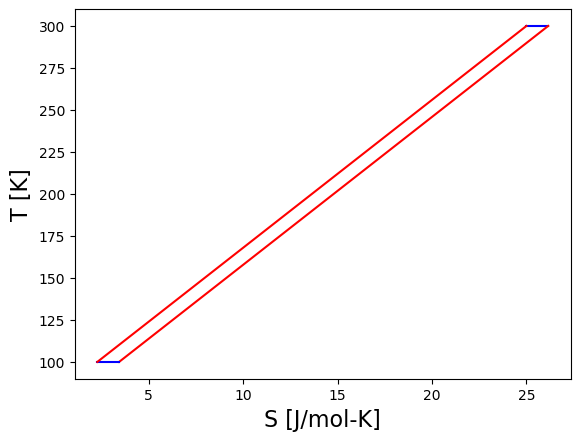

In [15]:
# plot the TS diagram -
# You need to pick an arbitary S1 value so we can see the cycle -
plot_TS_diagram(stateTable,pathTable);
xlabel("S [J/mol-K]",fontsize=16);
ylabel("T [K]",fontsize=16);